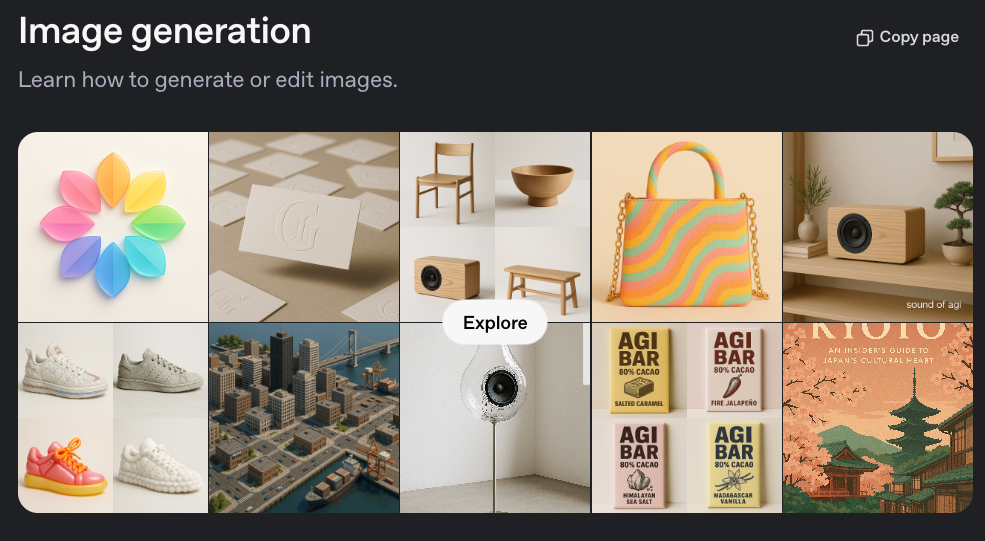

https://platform.openai.com/docs/guides/image-generation?image-generation-model=gpt-image-1

In [1]:
import IPython
import sys

def clean_notebook():
    IPython.display.clear_output(wait=True)
    print("Notebook cleaned.")

!pip install openai
!pip install gradio

# Clean up the notebook
clean_notebook()

Notebook cleaned.


In [2]:
import os
from openai import OpenAI
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

True

# Streaming  Mode

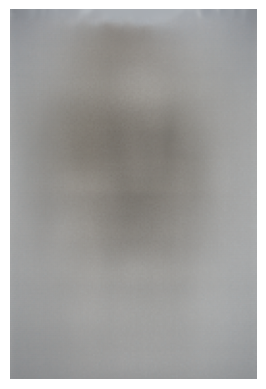

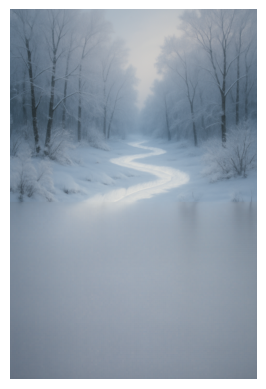

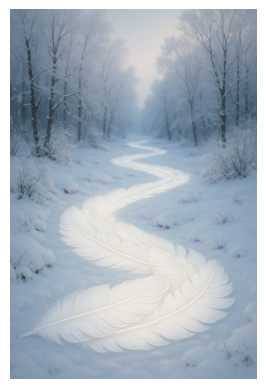

In [3]:
import base64
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
from openai import OpenAI


client = OpenAI()

stream = client.responses.create(
    model="gpt-4.1",
    input="Draw a gorgeous image of a river made of white owl feathers, snaking its way through a serene winter landscape",
    stream=True,
    tools=[{"type": "image_generation", "partial_images": 2}],
)

for event in stream:
    if event.type == "response.image_generation_call.partial_image":
        idx = event.partial_image_index
        image_base64 = event.partial_image_b64
        image_bytes = base64.b64decode(image_base64)
        image = Image.open(BytesIO(image_bytes))
        # Display the image
        plt.imshow(image)
        plt.axis('off')
        plt.show()

# Batch processing

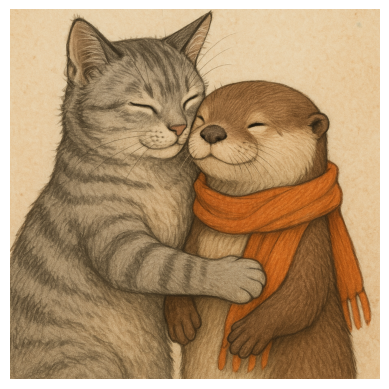

In [4]:
import os
import base64
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
from openai import OpenAI

# Initialize OpenAI client with API key
openai_client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

# Generate an image
response = openai_client.images.generate(
    model="gpt-image-1",  # "dall-e-1" or "dall-e-2", "gpt-image-1"
    prompt="A gray tabby cat hugging an otter wearing an orange scarf",
    size="1024x1024",
    quality="high",   # Use 'low', 'medium', 'high', or 'auto'
    n=1
)

# Decode the base64 image
image_base64 = response.data[0].b64_json
image_bytes = base64.b64decode(image_base64)
image = Image.open(BytesIO(image_bytes))

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()


# Compare image generation models with 3 prompts



In [5]:
import os
import base64
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
from openai import OpenAI

# Initialize OpenAI client with API key
openai_client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

# Define your 3 prompts
prompts = [
    "A fluffy white cat wearing sunglasses sitting on a windowsill",
    "A scenic view of Bangkok with boats on the Chao Phraya River at sunset",
    "A cartoon-style cat riding a tuk-tuk in Bangkok"
]

# Store generated images
images = []

# Generate and decode images for each prompt
for prompt in prompts:
    response = openai_client.images.generate(
        model="gpt-image-1",  # Use "gpt-image-1" for current image model
        prompt=prompt,
        size="1024x1024",
        quality="high",  # Options: "low", "medium", "high", or "auto"
        n=1
    )
    image_base64 = response.data[0].b64_json
    image_bytes = base64.b64decode(image_base64)
    image = Image.open(BytesIO(image_bytes))
    images.append(image)



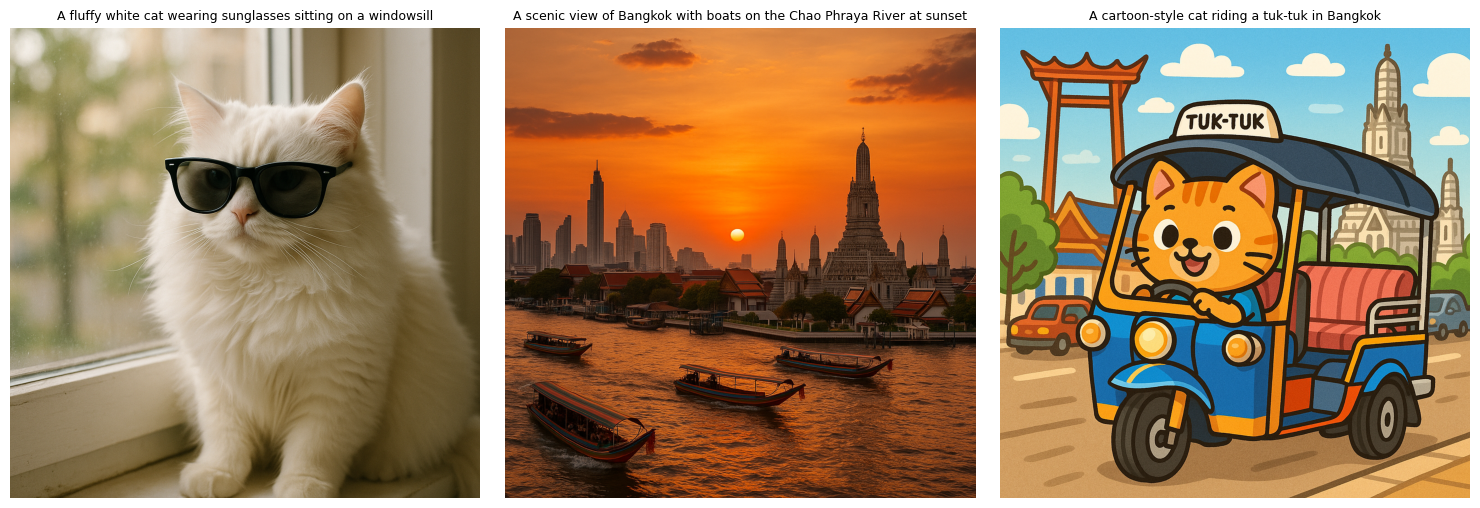

In [6]:

# Display images with matplotlib
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, img, title in zip(axes, images, prompts):
    ax.imshow(img)
    ax.set_title(title, fontsize=9)
    ax.axis('off')

plt.tight_layout()
plt.show()